<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_6_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.619734,69.542567,73.359394,361.991081,546.512776,104.883418,441.629358
1,0.0,1.0,32.164740,71.090232,42.412609,1137.259924,1292.927504,11.912598,1281.014906
2,0.0,2.0,47.353115,33.527198,48.535148,58.228088,197.643549,176.012247,21.631302
3,0.0,3.0,31.164812,90.290118,45.730886,2216.796446,2393.982263,-50.795775,2444.778038
4,0.0,4.0,45.280858,44.125888,56.426332,221.789090,377.622167,157.852030,219.770137
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.395887,78.959996,96.458242,-1743.875179,-1526.061055,333.903436,-1859.964491
119996,999.0,116.0,98.661812,94.694481,59.498890,-1199.045065,-936.189881,289.076992,-1225.266874
119997,999.0,117.0,76.571241,47.689194,26.294354,-515.664233,-355.109445,22.634379,-377.743823
119998,999.0,118.0,51.590097,86.897426,78.764160,413.707522,640.959205,319.343058,321.616147


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.619734,69.542567,73.359394,361.991081,546.512776,104.883418,441.629358
1,0.0,1.0,32.164740,71.090232,42.412609,1137.259924,1292.927504,11.912598,1281.014906
2,0.0,2.0,47.353115,33.527198,48.535148,58.228088,197.643549,176.012247,21.631302
3,0.0,3.0,31.164812,90.290118,45.730886,2216.796446,2393.982263,-50.795775,2444.778038
4,0.0,4.0,45.280858,44.125888,56.426332,221.789090,377.622167,157.852030,219.770137
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.395887,78.959996,96.458242,-1743.875179,-1526.061055,333.903436,-1859.964491
119996,999.0,116.0,98.661812,94.694481,59.498890,-1199.045065,-936.189881,289.076992,-1225.266874
119997,999.0,117.0,76.571241,47.689194,26.294354,-515.664233,-355.109445,22.634379,-377.743823
119998,999.0,118.0,51.590097,86.897426,78.764160,413.707522,640.959205,319.343058,321.616147


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    31.619734  69.542567  ...  104.883418   441.629358
      1.0    32.164740  71.090232  ...   11.912598  1281.014906
      2.0    47.353115  33.527198  ...  176.012247    21.631302
      3.0    31.164812  90.290118  ...  -50.795775  2444.778038
      4.0    45.280858  44.125888  ...  157.852030   219.770137
...                ...        ...  ...         ...          ...
999.0 115.0  32.395887  78.959996  ...  333.903436 -1859.964491
      116.0  98.661812  94.694481  ...  289.076992 -1225.266874
      117.0  76.571241  47.689194  ...   22.634379  -377.743823
      118.0  51.590097  86.897426  ...  319.343058   321.616147
      119.0  82.448936  27.987259  ...   41.253909   262.245856

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    31.619734  69.542567  ...  104.883418   441.629358
      1.0    32.164740  71.090232  ...   11.912598  1281.014906
      2.0    47.353115  33.527198  ...  176.012247    21.631302
      3.0    31.164812  90.290118  ...  -50.795775  2444.778038
      4.0    45.280858  44.125888  ...  157.852030   219.770137
...                ...        ...  ...         ...          ...
999.0 115.0  32.395887  78.959996  ...  333.903436 -1859.964491
      116.0  98.661812  94.694481  ...  289.076992 -1225.266874
      117.0  76.571241  47.689194  ...   22.634379  -377.743823
      118.0  51.590097  86.897426  ...  319.343058   321.616147
      119.0  82.448936  27.987259  ...   41.253909   262.245856

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.619734,69.542567,73.359394,361.991081,546.512776,104.883418,441.629358
1,0.0,1.0,32.164740,71.090232,42.412609,1137.259924,1292.927504,11.912598,1281.014906
2,0.0,2.0,47.353115,33.527198,48.535148,58.228088,197.643549,176.012247,21.631302
3,0.0,3.0,31.164812,90.290118,45.730886,2216.796446,2393.982263,-50.795775,2444.778038
4,0.0,4.0,45.280858,44.125888,56.426332,221.789090,377.622167,157.852030,219.770137
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.395887,78.959996,96.458242,-1743.875179,-1526.061055,333.903436,-1859.964491
119996,999.0,116.0,98.661812,94.694481,59.498890,-1199.045065,-936.189881,289.076992,-1225.266874
119997,999.0,117.0,76.571241,47.689194,26.294354,-515.664233,-355.109445,22.634379,-377.743823
119998,999.0,118.0,51.590097,86.897426,78.764160,413.707522,640.959205,319.343058,321.616147


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    31.619734  69.542567  ...  104.883418   441.629358
      1.0    32.164740  71.090232  ...   11.912598  1281.014906
      2.0    47.353115  33.527198  ...  176.012247    21.631302
      3.0    31.164812  90.290118  ...  -50.795775  2444.778038
      4.0    45.280858  44.125888  ...  157.852030   219.770137
...                ...        ...  ...         ...          ...
999.0 115.0  32.395887  78.959996  ...  333.903436 -1859.964491
      116.0  98.661812  94.694481  ...  289.076992 -1225.266874
      117.0  76.571241  47.689194  ...   22.634379  -377.743823
      118.0  51.590097  86.897426  ...  319.343058   321.616147
      119.0  82.448936  27.987259  ...   41.253909   262.245856

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

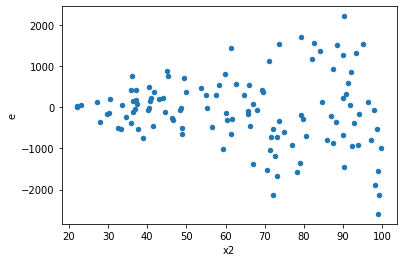

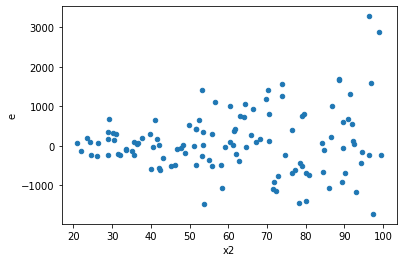

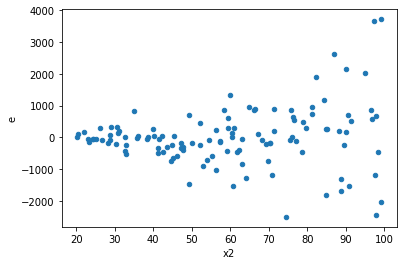

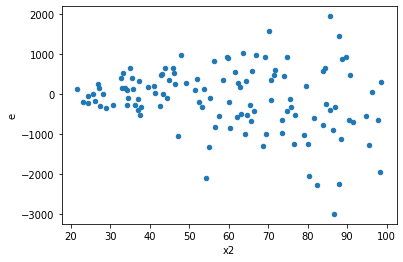

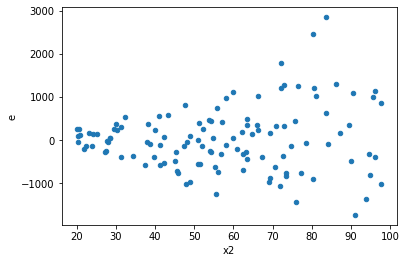

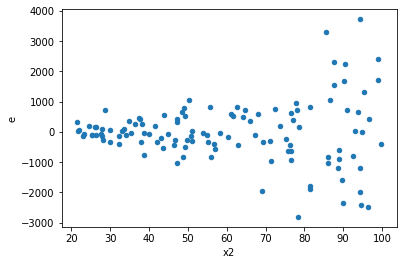

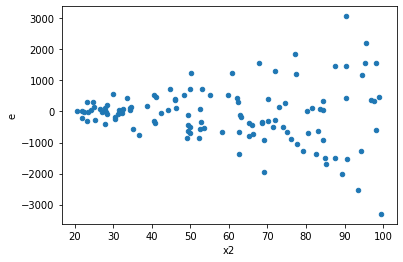

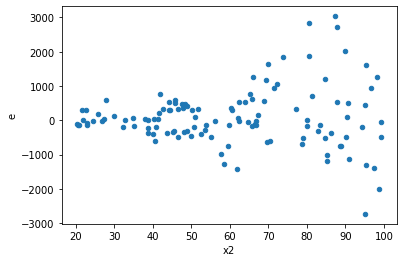

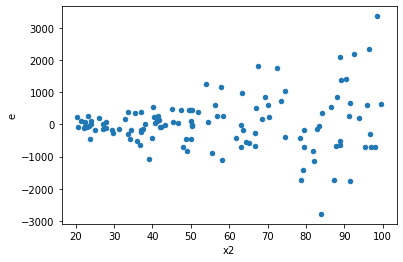

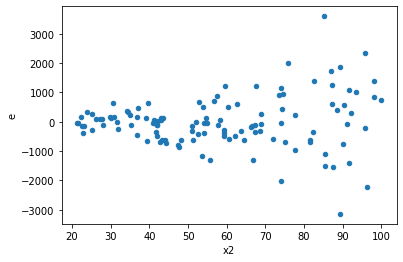

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,57809910.29392886,6538425.658399178,1313861.5975892923,148600.58314543587,8.841564210440627,2.0978996317921883e-11,0.9999999999895105,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,54064957.64552159,6107033.434396118,1228749.037398218,138796.2144180936,8.852900221737151,2.049693748062964e-11,0.9999999999897515,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,81989165.33712631,5221078.385044196,1863390.1212983252,118660.87238736809,15.703492514493687,4.440892098500626e-16,0.9999999999999998,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,49110202.67261223,5940975.792796072,1116140.969832096,135022.17710900164,8.266352933496622,7.045564132113213e-11,0.9999999999647722,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,41288781.266619824,6144020.592927162,938381.3924231778,139636.83165743548,6.720156718574544,2.600473170133455e-09,0.9999999986997634,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,94530615.36090882,6500458.292864358,2148423.0763842915,147737.68847418996,14.542146276775034,1.5543122344752192e-15,0.9999999999999992,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,77619553.75247735,5177962.365433626,1764080.767101758,117680.96285076422,14.990366533105757,8.881784197001252e-16,0.9999999999999996,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,62780165.351954445,5097088.792621609,1426821.9398171464,115842.92710503656,12.316867118899932,4.218847493575595e-14,0.9999999999999789,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,64859166.03438132,4067391.6486980105,1474071.9553268482,92440.71928859115,15.946132469230745,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,57809910.29392886,6538425.658399178,1313861.5975892923,148600.58314543587,8.841564210440627,2.0978996317921883e-11,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,54064957.64552159,6107033.434396118,1228749.037398218,138796.2144180936,8.852900221737151,2.049693748062964e-11,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,81989165.33712631,5221078.385044196,1863390.1212983252,118660.87238736809,15.703492514493687,4.440892098500626e-16,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,49110202.67261223,5940975.792796072,1116140.969832096,135022.17710900164,8.266352933496622,7.045564132113213e-11,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,41288781.266619824,6144020.592927162,938381.3924231778,139636.83165743548,6.720156718574544,2.600473170133455e-09,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,94530615.36090882,6500458.292864358,2148423.0763842915,147737.68847418996,14.542146276775034,1.5543122344752192e-15,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,77619553.75247735,5177962.365433626,1764080.767101758,117680.96285076422,14.990366533105757,8.881784197001252e-16,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,62780165.351954445,5097088.792621609,1426821.9398171464,115842.92710503656,12.316867118899932,4.218847493575595e-14,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,64859166.03438132,4067391.6486980105,1474071.9553268482,92440.71928859115,15.946132469230745,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64